In [561]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [562]:
counts_table_path = '/Users/stephaniecrilly/test/count_table.csv'
counts_table = pd.read_csv(counts_table_path, sep='\t')

flow_table_path = '/Users/stephaniecrilly/test/flow_table.csv'
flow_table = pd.read_csv(flow_table_path)

outdir = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/figures'

if not os.path.exists(outdir):
   os.makedirs(outdir)

Each column represents a given sort condition (concentration and bin). Normalizing the counts for each design (row) as a fraction of total counts matching library designs for each sort condition by dividing each value by the summed column counts. 

In [563]:
#divide every column by the sum of the column
norm_counts_table = counts_table.copy()
for col in norm_counts_table.columns:
    if col == 'design':
        continue
    else:
        norm_counts_table[col] = norm_counts_table[col] / norm_counts_table[col].sum() 

norm_counts_table_og = norm_counts_table.copy()

In [564]:
#get list of designs for plotting

designs_to_plot = 'min_0_52_bm01' #controls, min_0_52_g4s, min_0_52_bm01, min_0_53_g4s, min_0_53_bm01, min_2_52_g4s, min_2_52_bm01, min_2_53_g4s, min_2_53_bm01

list_of_designs = norm_counts_table.design.tolist() 
selected_designs = []

if designs_to_plot == 'controls':
    #controls
    selected_designs = ['bm01_ALFA_1c', 'bm01_ALFA_t2', 'bm01_ALFA_t3', 'bm01_ALFA_t6']
    color_palette = ['cyan', 'red', 'orange', 'green']

else:
    color_palette = ['cyan']
    for design in list_of_designs:
        if designs_to_plot in design:
            selected_designs.append(design)

In [565]:
#selecting control designs in library for plotting
norm_counts_table = norm_counts_table[norm_counts_table['design'].isin(selected_designs)]

#reorder the columns
cols = norm_counts_table.columns.tolist()
#reorder list alphabetically
cols = sorted(cols)
norm_counts_table = norm_counts_table[cols]

norm_counts_table = pd.melt(norm_counts_table, id_vars=['design'], value_vars=norm_counts_table.columns[1:])
norm_counts_table[['library_id', 'bin']] = norm_counts_table['variable'].str.split('-hs-', expand=True)

In [566]:
#plot counts for designs across all bins with counts data
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=2.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    if designs_to_plot == 'controls':
        sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=[color_palette[plot]], order=['SD', '1-1', '1-2', '1-3', '1-4', '2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4',
                        '5-1', '5-2', '5-3', '5-4', '6-1', '6-2', '6-3', '6-4', '7-1', '7-2', '7-3', '7-4', '8-1', '8-2', '8-3', '8-4', '9-1', '9-2', '9-3', '10-1', '10-2', '10-3', '11-1', '11-2', '12-1']).set(xlabel=None, ylabel=None)

    else: 
        sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=color_palette, order=['SD', '1-1', '1-2', '1-3', '1-4', '2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4',
                        '5-1', '5-2', '5-3', '5-4', '6-1', '6-2', '6-3', '6-4', '7-1', '7-2', '7-3', '7-4', '8-1', '8-2', '8-3', '8-4', '9-1', '9-2', '9-3', '10-1', '10-2', '10-3', '11-1', '11-2', '12-1']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.savefig(f'{outdir}/normalized_counts_all_bins_{designs_to_plot}.png')
plt.clf()

<Figure size 1500x3600 with 0 Axes>

In [567]:
#plot counts for designs in bin 4 only
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=2.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    if designs_to_plot == 'controls':
        sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=[color_palette[plot]], order=['SD', '1-4', '2-4', '3-4', '4-4',
                         '5-4', '6-4', '7-4', '8-4']).set(xlabel=None, ylabel=None)
    else:
        sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=color_palette, order=['SD', '1-4', '2-4', '3-4', '4-4',
                        '5-4', '6-4', '7-4', '8-4']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.savefig(f'{outdir}/normalized_counts_bin_4_{designs_to_plot}.png')
plt.clf()

<Figure size 1500x3600 with 0 Axes>

When amount of antigen used in labeling is comparable in magnitude to Kd, the amount of bound antigen can provide a readout of Kd (See Adams, et al. eLife 2017 Fig 4, sup 5). 

Observed on-yeast Kd for ALFA tag is ~70-100 pM under labeling conditions used for tite-seq pilot sort. 

Computing enrichment in high fluorescence bins (2-4) for concentration 7 (100 pM), relative to the low fluorescence bin (bin1), with counts re-weighted to reflect fraction of cells within that bin. 

In [568]:
#first pull out the data for concentration 7
conc_to_plot = 7
counts_table_conc = counts_table[['design', f'r1-hs-{conc_to_plot}-1', f'r1-hs-{conc_to_plot}-2', f'r1-hs-{conc_to_plot}-3', f'r1-hs-{conc_to_plot}-4']]

#pool counts from high bins (2-4)
counts_table_conc[f'r1-hs-{conc_to_plot}-2-4'] = counts_table_conc[f'r1-hs-{conc_to_plot}-2'] + counts_table_conc[f'r1-hs-{conc_to_plot}-3'] + counts_table_conc[f'r1-hs-{conc_to_plot}-4']

#drop the individual bin columns
counts_table_conc = counts_table_conc.drop(columns=[f'r1-hs-{conc_to_plot}-2', f'r1-hs-{conc_to_plot}-3', f'r1-hs-{conc_to_plot}-4'])

#normalize to total counts for that concentration
norm_counts_table_conc = counts_table_conc.copy()
for col in norm_counts_table_conc.columns:
    if col == 'design':
        continue
    else:
        norm_counts_table_conc[col] = norm_counts_table_conc[col] / norm_counts_table_conc[col].sum() 

#express all columns as enrichment over bin 1
counts_table_conc[f'r1-hs-{conc_to_plot}-2-4_enrichment'] = counts_table_conc[f'r1-hs-{conc_to_plot}-2-4'] / counts_table_conc[f'r1-hs-{conc_to_plot}-1']

counts_table_conc[f'r1-hs-{conc_to_plot}-2-4_enrichment_log10'] = np.log10(counts_table_conc[f'r1-hs-{conc_to_plot}-2-4_enrichment'])
counts_table_conc = counts_table_conc.drop(columns=[f'r1-hs-{conc_to_plot}-1', f'r1-hs-{conc_to_plot}-2-4', f'r1-hs-{conc_to_plot}-2-4_enrichment'])
print(counts_table_conc)

                                design  r1-hs-7-2-4_enrichment_log10
0    01034_ALFA_53_7_min_0_53_g4s_loop                      2.331985
1    01934_ALFA_53_4_min_0_53_g4s_loop                      2.722762
2    02231_ALFA_53_4_min_0_53_g4s_loop                     -2.227089
3   02532_ALFA_53_7_min_0_53_bm01_loop                      2.290140
4   02532_ALFA_53_8_min_0_53_bm01_loop                      1.898861
..                                 ...                           ...
92              bm01_L2_myc_ALFA_t6_v2                     -1.835691
93              bm01_L3_myc_ALFA_t6_v2                     -2.243299
94              bm01_L4_myc_ALFA_t6_v2                     -2.263121
95              bm01_L5_myc_ALFA_t6_v2                     -2.145352
96              bm01_L6_myc_ALFA_t6_v2                     -0.561380

[97 rows x 2 columns]


/var/folders/7h/sws1byhj2pzb__hgp1w6_3j80000gn/T/ipykernel_52118/3080758695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_table_conc[f'r1-hs-{conc_to_plot}-2-4'] = counts_table_conc[f'r1-hs-{conc_to_plot}-2'] + counts_table_conc[f'r1-hs-{conc_to_plot}-3'] + counts_table_conc[f'r1-hs-{conc_to_plot}-4']


                                 design  r1-hs-7-2-4_enrichment_log10
52   10632_ALFA_52_4_min_0_52_bm01_loop                      2.251710
54  11535_ALFA_52_10_min_0_52_bm01_loop                      0.127625
56   11832_ALFA_52_2_min_0_52_bm01_loop                     -1.936473
58   11835_ALFA_52_6_min_0_52_bm01_loop                     -1.169609
60   11836_ALFA_52_8_min_0_52_bm01_loop                      0.683186
62   12133_ALFA_52_5_min_0_52_bm01_loop                      2.313033
64   12435_ALFA_52_8_min_0_52_bm01_loop                      2.629197
66   12733_ALFA_52_7_min_0_52_bm01_loop                     -2.496007
68   12736_ALFA_52_5_min_0_52_bm01_loop                     -2.315005
70   12736_ALFA_52_8_min_0_52_bm01_loop                      0.916454
72   13033_ALFA_52_7_min_0_52_bm01_loop                     -2.110309
74   13034_ALFA_52_8_min_0_52_bm01_loop                      0.359672
76   13336_ALFA_52_1_min_0_52_bm01_loop                     -1.101407
78  13337_ALFA_52_10

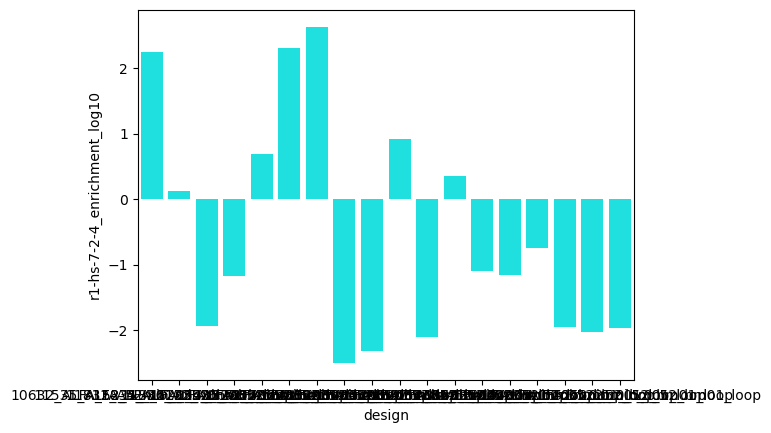

In [569]:
#plot
#selecting control designs in library for plotting
counts_table_conc = counts_table_conc[counts_table_conc['design'].isin(selected_designs)]

#reorder the columns
#cols = counts_table_conc.columns.tolist()
#reorder list alphabetically
# cols = sorted(cols)
# counts_table_conc = counts_table_conc[cols]

# counts_table_conc = pd.melt(counts_table_conc, id_vars=['design'], value_vars=counts_table_conc.columns[1:])
# print(counts_table_conc)
# counts_table_conc[['library_id', 'bin']] = counts_table_conc['variable'].str.split('-hs-', expand=True)

print(counts_table_conc)
#plot counts for designs in bin 4 only
# num_subplots = len(selected_designs)
# fig, axes = plt.subplots(num_subplots, 1, figsize=(4, num_subplots*2), sharex=True)
# fig.tight_layout(pad=2.0)
# fig.supxlabel('Bin', y=-0.01)
# fig.supylabel('Normalized Counts', x=-0.01)

sns.barplot(data=counts_table_conc, x='design', y='r1-hs-7-2-4_enrichment_log10', palette=color_palette)

plt.show()
#plt.savefig(f'{outdir}/normalized_counts_conc_{conc_to_plot}_{designs_to_plot}.png')
#plt.clf()


Next calculating probability component from mean bin analysis at concentration 7. 

'The fraction of total reads in the bin corresponding to sequence s, scaled by the number of sorted cells in that bin, normalized over the four bins for each concentration.'

In [570]:
#normalie fraction of reads in that bin-done 



#normalize across the binds for that cncentration for a given design
#counts_table_conc = counts_table_conc.iloc[:, 1:].div(counts_table_conc.sum(axis=1), axis=0)

#normalize to total counts within each sample


#normalie to cell counts for each bin
#for i in range(1,5):
    #counts_table_conc[f'r1-hs-{conc_to_plot}-{i}'] = counts_table_conc[f'r1-hs-{conc_to_plot}-{i}'] / flow_table_conc.loc[flow_table_conc['bin'] == i, 'cell count norm'].iloc[0]

#express all columns as enrichment over bin 1
for i in range(1,5):
    counts_table_conc[f'r1-hs-{conc_to_plot}-{i}'] = counts_table_conc[f'r1-hs-{conc_to_plot}-{i}'] / counts_table_conc[f'r1-hs-{conc_to_plot}-1']

#print(counts_table_conc)
print(counts_table_conc.dtypes)

for col in counts_table_conc.columns:
    if col == 'design':
        continue
    else:
        counts_table_conc[col] = np.log10(counts_table_conc[col])

counts_table_conc = pd.concat([counts_table['design'], counts_table_conc], axis=1)
print(counts_table_conc.query("design == 'bm01_ALFA_1c'"))

KeyError: 'r1-hs-7-1'